In [1]:
import os
import numpy as np
import pandas as pd
import openpyxl
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.stattools import adfuller

# Set directory path to current directory
dir_path = os.path.abspath('../')
output_path = os.path.abspath('../outputs')

dat = os.path.join(dir_path, 'control_variables.xlsx')

In [2]:
df = pd.read_excel(dat, index_col=0, sheet_name="data")
df = pd.DataFrame(df)

# df.index = pd.Series(df.index).fillna(method='ffill')

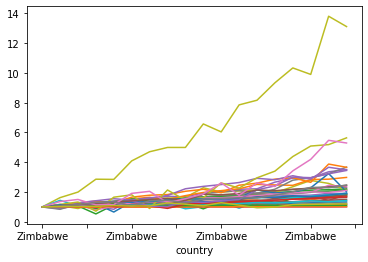

In [4]:
for name, group in df.groupby('country'):
    group['dElec'].plot()

In [7]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
for name, group in df.groupby('country'):
    highest_elec_rate = group['elec_rate'].iloc[-1]
    # print(f'For country {name}, the highest electrification rate is: \n{highest_elec_rate}')

In [ ]:
for name, group in df.groupby('country'):
    # print(f'This is the ADf test results for {name}\'s changes in Electrifiction date')
    adf_test(group['elec_rate'])

In [ ]:
for name, group in df.groupby('country'):
    # print(f'This is the ADf test results for {name}\'s changes in CPI')
    adf_test(group['dCPI'])

In [37]:
df['cpi diff'] = df['cpi-2010'].groupby('country').diff().diff()


# df['dist diff'] = df['log distribution'].groupby('country').diff()
# df['dist diff'].fillna(0, inplace=True)

# df['cpi diff'].fillna(0, inplace=True)

# df['govern diff'].fillna(0, inplace=True)

print(df['cpi diff'])

for name, group in df.groupby('country'):
    print(f'This is the ADf test results for {name}\'s governance')
    adf_test(group['dist diff'].iloc[2:-1])

country
Angola             NaN
Angola             NaN
Angola       -1.828450
Angola       -3.223132
Angola       -2.879781
               ...    
Zimbabwe     -2.430605
Zimbabwe      1.006760
Zimbabwe      2.574428
Zimbabwe     10.268949
Zimbabwe    286.768301
Name: cpi diff, Length: 702, dtype: float64
This is the ADf test results for Angola's governance
Results of Dickey-Fuller Test:
Test Statistic                  0.323037
p-value                         0.978377
#Lags Used                      0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64
This is the ADf test results for Benin's governance
Results of Dickey-Fuller Test:
Test Statistic                 -2.785929
p-value                         0.060312
#Lags Used                      2.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)  

/opt/anaconda3/envs/MyPythonProject/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/anaconda3/envs/MyPythonProject/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Test Statistic                -7.965839e+00
p-value                        2.866655e-12
#Lags Used                     2.000000e+00
Number of Observations Used    1.200000e+01
Critical Value (1%)           -4.137829e+00
Critical Value (5%)           -3.154972e+00
Critical Value (10%)          -2.714477e+00
dtype: float64
This is the ADf test results for Lesotho's governance
Results of Dickey-Fuller Test:
Test Statistic                 -2.958835
p-value                         0.038922
#Lags Used                      1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64
This is the ADf test results for Madagascar's governance
Results of Dickey-Fuller Test:
Test Statistic                 -3.329482
p-value                         0.013611
#Lags Used                      0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.0120

In [ ]:
coeffients = []

headers = ["Constant", "Energy Distribution", "Energy generation, nonrenewable", "Energy Policy", "Energy generation, renewable", "GDP", "CPI", "Governance", "Trade openness"]

countries = []

significance = []

rsq = []
rsq_adj = []

In [3]:
df['log policy'] = np.log2(df['policy cumulative']+1)
df['log rgen'] = np.log2(df['rgen cumulative']+1)
df['log nrgen'] = np.log2(df['nrgen cumulative']+1)
df['log distribution'] = np.log2(df['distribution cumulative']+1)
df['log cpi'] = np.log2(df['dCPI'])
df['log govern'] = np.log2(df['governance'])
df['log elec'] = np.log2(df['dElec'])
df['log gdp'] = np.log2(df['dGDP'])

/opt/anaconda3/envs/MyPythonProject/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


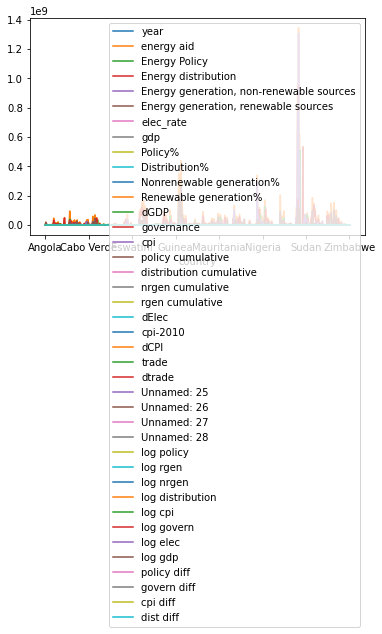

In [27]:

_= df.plot()

In [11]:
df['policy diff'] = df['log policy'].groupby('country').diff(-1)
df['govern diff'] = df['log govern'].groupby('country').diff(-1)

print(df['govern diff'])

country
Angola     -0.205127
Angola      0.015434
Angola     -0.065194
Angola     -0.163714
Angola      0.036149
              ...   
Zimbabwe    0.016065
Zimbabwe   -0.014382
Zimbabwe   -0.054648
Zimbabwe    0.034553
Zimbabwe         NaN
Name: govern diff, Length: 702, dtype: float64


In [ ]:
# Write the data into an excel sheet
with pd.ExcelWriter(output,
                    engine='openpyxl',
                    mode='a',
                    if_sheet_exists="new",
) as writer:
    writer.book = openpyxl.load_workbook(output)
    df['log policy'].to_excel(writer, sheet_name='log policy')
    df['log rgen'].to_excel(writer, sheet_name='log rgen')
    df['log nrgen'].to_excel(writer, sheet_name='log nrgen')
    df['log distribution'].to_excel(writer, sheet_name='log dist')
    df['log cpi'].to_excel(writer, sheet_name='log cpi')
    df['log govern'].to_excel(writer, sheet_name='log govern')
    df['log elec'].to_excel(writer, sheet_name='log elec')
    df['log gdp'].to_excel(writer, sheet_name='log gdp')

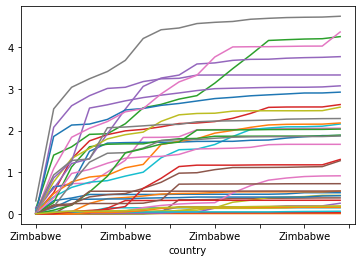

In [4]:
for name, group in df.groupby('country'):
    # print(f'This is the ADf test results for {name}\'s cumulative value for aid in energy distribution')
    # df.plot(group['log rgen'])
    # adf_test(group['log rgen'])
    
    group['log rgen'].plot()

In [ ]:
for name, group in df.groupby('country'):
    # print(name)
    
    y=group['log elec']

    # Model 1: The multiple regression model describes the response as a weighted sum of the predictors:(Elec = beta_0 + beta_1*ED + beta_2*EG,nr ~)
    X0 = group[['log distribution',
                'log nrgen',
                'log policy',
                'log rgen',
                # 'log gdp',
                'log cpi',
                'log govern'               
                ]]
    
    X0 = sm.add_constant(X0)
    
    reg = sm.OLS(y, X0).fit()
    
    print(reg.summary())
    
    # coeffients.append(reg.params)
    # rsq.append(reg.rsquared)
    # rsq_adj.append(reg.rsquared_adj)
    # # coeffients.extend([reg.params.values.flatten(), (100*reg.rsquared).astype(int), (100*reg.rsquared_adj).astype(int)])
    
    # significance.append(reg.pvalues)

    # countries.append(name)
    
    

In [ ]:
output = os.path.join(output_path, 'model4_output.xlsx')
# print(significance)

p_df = pd.DataFrame(significance)

# Write the data into an excel sheet
with pd.ExcelWriter(output,
                    engine='openpyxl',
                    mode='a',
                    if_sheet_exists="new",
) as writer:
    writer.book = openpyxl.load_workbook(output)
    p_df.to_excel(writer, sheet_name='pvalue-eleccum')

In [ ]:
# Putting the coefficients into a table
tbl = SimpleTable(coeffients, headers, countries,
                  data_fmts=["%3.2f","%d"])

# Turning the table into a dataframe
tbl_df = pd.DataFrame(tbl, columns=["Country", "Constant", "Energy Distribution", "Energy generation, nonrenewable", "Energy Policy", "Energy generation, renewable", "GDP", "CPI", "Governance", "Trade openness"])

# Write grouped aid data to excel file

# Write the data into an excel sheet
with pd.ExcelWriter(output,
                    engine='openpyxl',
                    mode='a',
                    if_sheet_exists="new",
) as writer:
    writer.book = openpyxl.load_workbook(output)
    tbl_df.to_excel(writer, sheet_name='coef-eleccum')


In [ ]:
# Turning array with r-squared and r-sqaured adjusted values into dataframes
rsq_df = pd.DataFrame(rsq, columns=['r-squared-eleccum'])
rsq_adj_df = pd.DataFrame(rsq_adj, columns=['r-squared adjusted-eleccum'])

# Turning the data into columns
# rsq_df = rsq_df.transpose()
# rsq_adj_df = rsq_adj_df.transpose()

# Concating two data together (Got overlapped because didn't reset index)
rsq_dat = pd.concat([rsq_df, rsq_adj_df], axis=1)

# Write the data into an excel sheet
with pd.ExcelWriter(output,
                    engine='openpyxl',
                    mode='a',
                    if_sheet_exists="new",
) as writer:
    writer.book = openpyxl.load_workbook(output)
    rsq_dat.to_excel(writer, sheet_name='rsqua-eleccum')

reg operation:

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 'save', 'scale', 'ssr', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'uncentered_tss', 'use_t', 'wald_test', 'wald_test_terms', 'wresid']